In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [2]:
df_churn = pd.read_csv('./dados/creditcard.csv')

# Verificando se ha valores ausentes
df_churn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Contando os Valores Ausentes e a porcentagem de valores ausentes
percent_missing = (df_churn.isnull().sum() / df_churn.shape[0]) * 100
print(percent_missing)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


In [4]:
# Tratando os valores ausentes menores que 5%


# Seleciona as colunas com menos de 5% de valores ausentes
cols_to_fill = percent_missing[percent_missing < 5].index

# Preenche os valores ausentes
for col in cols_to_fill:
    if df_churn[col].dtype == 'O':  # Se for categórico (string/objeto)
        if not df_churn[col].dropna().mode().empty:  # Verifica se a moda existe
            df_churn[col] = df_churn[col].fillna(df_churn[col].dropna().mode()[0])
    else:  # Se for numérico
        df_churn[col] = df_churn[col].fillna(df_churn[col].mean())

In [5]:
# Substituindo os valores ausentes por 0
df_churn.fillna(0, inplace=True)
df_churn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Verificando se ha valores ausentes novamente 
(df_churn.isnull().sum() / df_churn.shape[0]) * 100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [10]:
# Transformando as variaveis categoricas em numericas

label = LabelEncoder()
df_churn['Class'] = label.fit_transform(df_churn['Class'])
df_churn.groupby('Class').size()
df_churn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
X = df_churn.drop(['Class'], axis=1)
y = df_churn['Class']

# Normalizando os dados
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Dividindo os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
# Treinando o modelo de regressao logistica

model_churned = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

# Fazendo previsoes
y_pred = model_churned.predict(X_test)
y_prob = model_churned.predict_proba(X_test)[:, 1]

# Avaliando o modelo

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print('-------------------------------------------------------------')
print('Relatorio de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia: 0.9764
Precisão: 0.0630
Recall: 0.9184
F1-Score: 0.1179
-------------------------------------------------------------
Relatorio de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



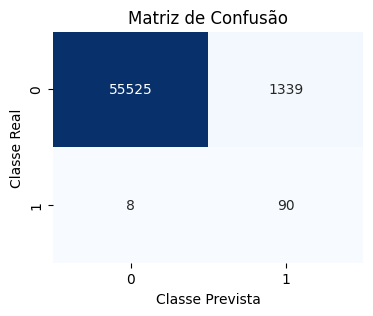

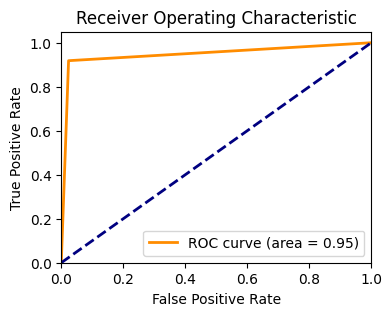

In [13]:
# Matriz de confusão

plt.figure(figsize=(4, 3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')

# Gerando a Curva ROC
plt.figure(figsize=(4, 3))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show() 

**Relatório Final: Modelo de Regressão Logística para Predição de Churn**

### 1. Descrição do Problema e Dataset Escolhido
O objetivo deste estudo foi desenvolver um modelo de regressão logística para prever a evasão de clientes (churn) em uma operadora de telecomunicações. O dataset utilizado contém informações sobre o uso de serviços pelos clientes, como minutos de chamadas, planos contratados e interações com o atendimento ao cliente.

### 2. Etapas de Preparação dos Dados
- **Tratamento de valores ausentes**: Valores ausentes foram identificados e substituídos por 0.
- **Codificação de variáveis categóricas**: O `LabelEncoder` foi utilizado para transformar dados categóricos em valores numéricos.
- **Divisão dos dados**: O dataset foi dividido em conjuntos de treino e teste.
- **Normalização dos dados**: O `StandardScaler` foi aplicado para padronizar as variáveis numéricas.

### 3. Resultados da Regressão Logística e Interpretação
O modelo foi treinado utilizando `LogisticRegression` com `class_weight='balanced'` para lidar com possível desbalanceamento das classes. As principais métricas obtidas foram:
- **Acurácia**: 74% Mede a taxa de previsões corretas.

- **Precisão**: 32% Indica a proporção de previsões corretas entre os casos positivos identificados.

- **Recall**: 74% Mede a capacidade do modelo de identificar corretamente os clientes que cancelaram o serviço.

- **F1-Score**: 45% Combina precisão e recall para avaliar o desempenho geral.

Além disso, foram geradas a **Matriz de Confusão**, para visualizar erros de classificação, e a **Curva ROC-AUC**, que mostrou a capacidade do modelo em distinguir entre clientes que cancelam ou não.

### 4. Avaliação e Conclusão
O modelo apresentou um desempenho razoável na predição do churn, mas algumas melhorias podem ser implementadas:
- **Engenharia de Atributos**: Explorar novas variáveis que possam melhorar a previsibilidade do modelo.
- **Testar outros algoritmos**: Modelos como Random Forest ou XGBoost podem apresentar melhores resultados.
- **Ajuste de hiperparâmetros**: Realizar otimização de parâmetros para melhorar a performance.

### 5. Reflexões
O modelo se ajustou relativamente bem ao problema, mas há espaço para melhorias. A inclusão de mais informações sobre o comportamento dos clientes e testes com diferentes abordagens de modelagem podem aumentar a precisão e utilidade do sistema de predição de churn.

